In [47]:
import pandas as pd
import numpy as np

In [48]:
# Load the DataFrame from the pickle file
df = pd.read_pickle('./data/example.pkl')
labels = ['DPAD_LEFT', 'DPAD_RIGHT', 'DPAD_DOWN', 'DPAD_UP', 'Z', 'R', 'L', 'A', 'B', 'X', 'Y', 'START']

# Now, 'loaded_df' contains the data from the pickle file as a DataFrame


In [49]:
print(df.head())
print(df.shape)

                                          TimeSeries  Label  \
0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1   
1  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      0   
2  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1   
3  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,...      1   
4  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      0   

                                               FName  
0            02_29_27.272Z Sheik + [C2] Fox (YS).slp  
1                      10_33_38 Sheik + Fox (DL).slp  
2  01_01_39.822Z [EASY] Fox + [LUST] Sheik (FoD).slp  
3                     10_37_27 Sheik + Fox (FoD).slp  
4   01_04_11.432Z [EASY] Fox + [LUST] Sheik (PS).slp  
(4516, 3)


In [50]:
df.sort_values(by=['FName','Label'],inplace=True)
df.reset_index(drop=True)

,TimeSeries,Label,FName
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,00_37_01.564Z [314] Fox + Sheik (FoD).slp
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,00_37_01.564Z [314] Fox + Sheik (FoD).slp
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,00_40_07.217Z [314] Fox + Sheik (DL).slp
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,00_40_07.217Z [314] Fox + Sheik (DL).slp
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,00_45_18.826Z [NELL] Fox + [LUST] Sheik (BF).slp
...,...,...,...
4511,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,Sheik vs Fox [YS] Game_20210222T125144.slp
4512,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,Sheik vs Fox [YS] Game_8C56C529AEAA_20200311T2...
4513,"[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",1,Sheik vs Fox [YS] Game_8C56C529AEAA_20200311T2...
4514,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,Sheik vs Fox [YS] Game_8C56C529AEAA_20200311T2...


In [51]:
df['TimeSeries'][0].shape

(720, 18)

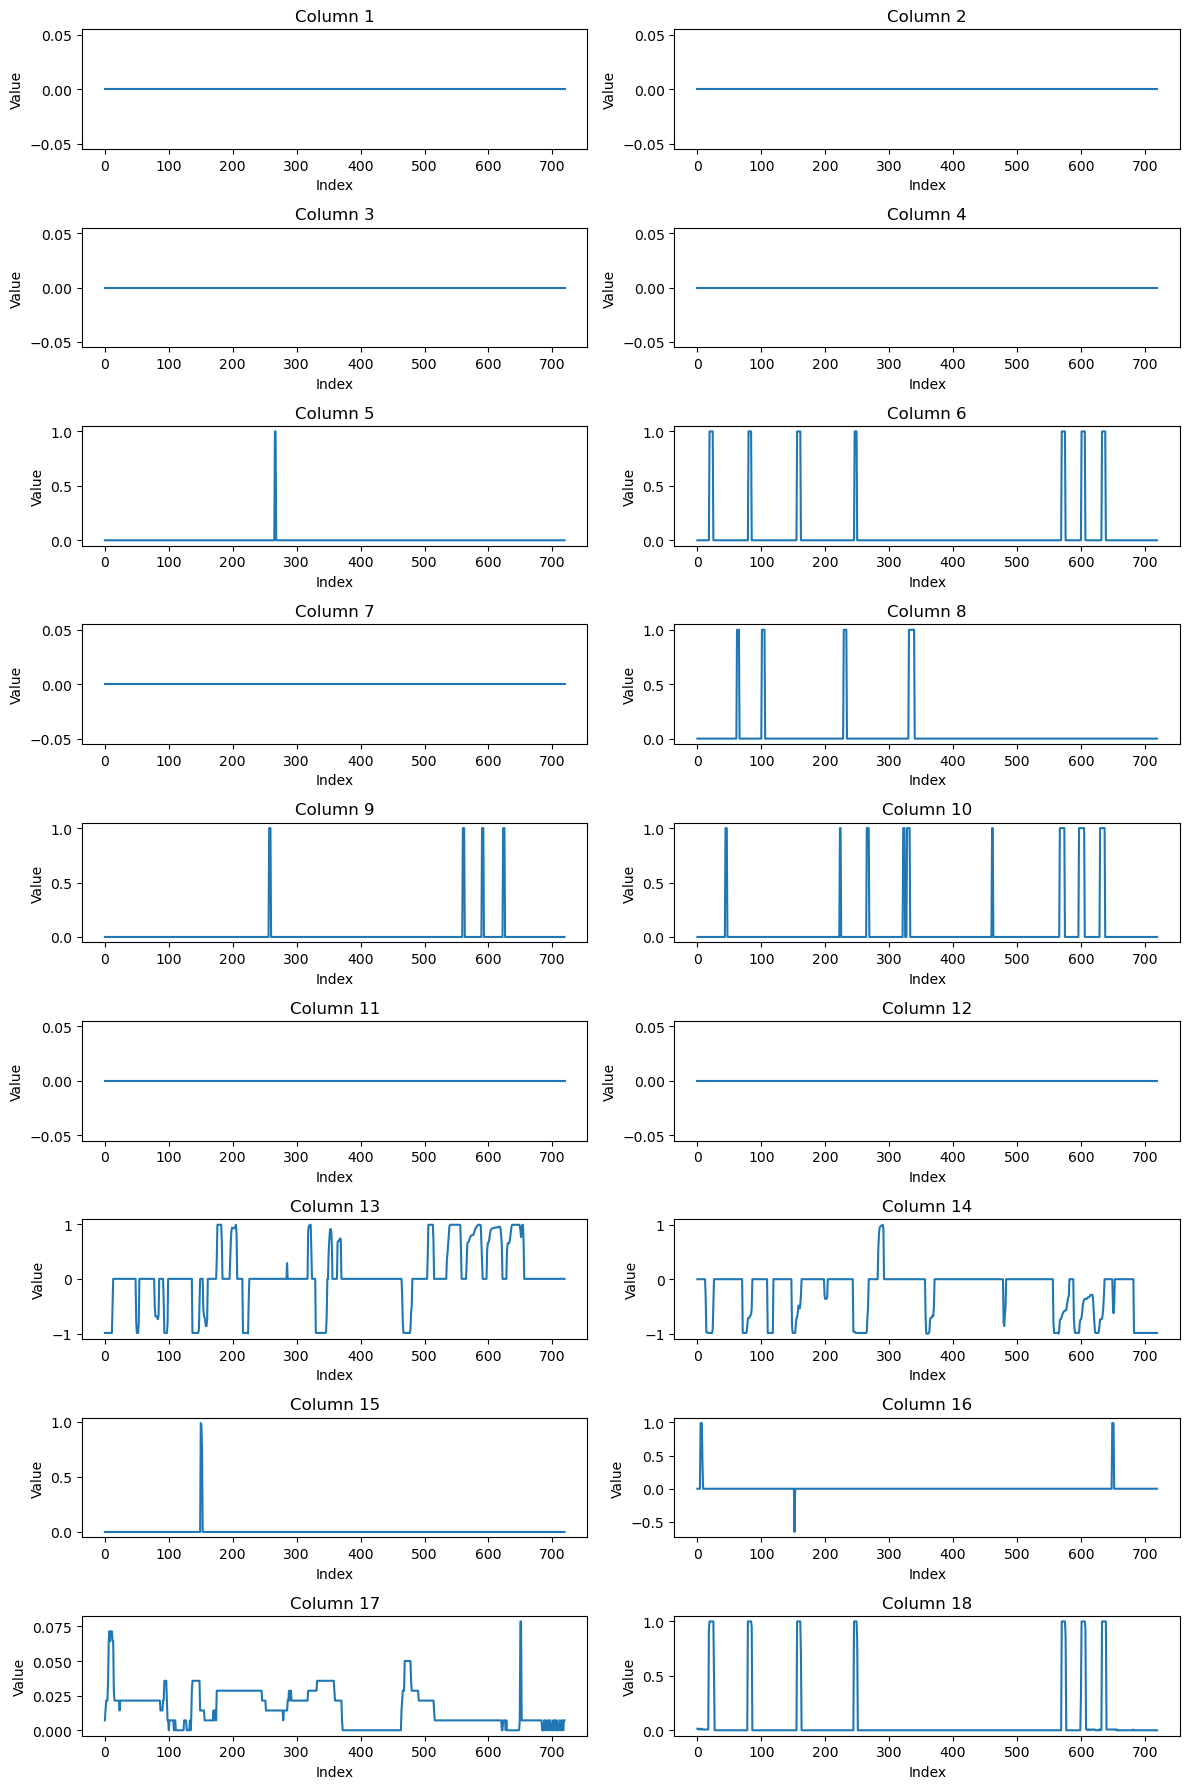

In [52]:
import matplotlib.pyplot as plt

# Create a random (720, 18) numpy array for demonstration
data = df['TimeSeries'][100]

# Create 18 line plots, one for each column
num_cols = data.shape[1]

# Set up subplots in a grid layout
num_rows = (num_cols + 1) // 2  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 18))

# Flatten the axes array if there's only one row
if num_rows == 1:
    axes = axes.ravel()

# Loop through each column and create a line plot
for i in range(num_cols):
    row_idx = i // 2  # Calculate the row index
    col_idx = i % 2   # Calculate the column index
    ax = axes[row_idx, col_idx]
    
    ax.plot(data[:, i])
    ax.set_title(f'Column {i + 1}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')

# Remove any empty subplots (if num_cols is odd)
if num_cols % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [53]:
# Get memory usage for each column in bytes
memory_usage = df.memory_usage(deep=True)

# Sum the memory usage values to get the total memory usage of the DataFrame
total_memory_usage = memory_usage.sum()

print(f"Total memory usage of the DataFrame: {total_memory_usage} bytes")

Total memory usage of the DataFrame: 1271758 bytes


In [54]:
print(df['TimeSeries'])

14      [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
16      [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
28      [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
29      [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
22      [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
                              ...                        
4496    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4505    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4504    [[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...
4509    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4508    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
Name: TimeSeries, Length: 4516, dtype: object


In [55]:
# df['TimeSeries'] = df['TimeSeries'].apply(lambda x: np.array(x, dtype=np.float16))

In [56]:
print(df['TimeSeries'][0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
Y,X,B,A,L,R,Z,DPAD_UP,DPAD_DOWN,DPAD_RIGHT,DPAD_LEFT,NONE,pressed()